
#Predicting Exoplanet habitability based on features of exoplanet and the host star
Workflow:
1. Acquire data from PHL database containing catalogue of 5600 exoplanets discovered
2. Get an overview of the dataset
3. Clean and preprocess data:
- Apply resampling method for balancing dataset by oversampling
- Handle missing values
  - remove features having more than 50% null values
- encode categorical features using labelencoding, save the encoder using pickle
- Impute values for the rest of categorical features
- Check for multicollinearity and remove those features
- Remove outliers
- Scale features, save scaler

4. Use feature engineering to identify features preidicting habitability
5. Create model and train with features selected. --RFClassifier/SGB/k-NN
6. Evaluate different models and select best one
7. Accept features from user:
- encode and scale it and then pass the features as an array  to the model for predicting the class



#Data Visualization

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/Ashique-1010/Datasets-for-EDA-ML/main/hwc.csv"
un_processed = pd.read_csv(url)
un_processed

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00000,-120.00000,413.00000,0,Mass,...,NaN,0.214133,0,0,NaN,0,NaN,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60000,-3.60000,4.40000,0,Mass,...,2.097783,0.316980,0,0,Hot,0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10000,NaN,NaN,0,M-R relationship,...,1.756317,0.459559,0,0,Hot,0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20000,NaN,NaN,0,M-R relationship,...,0.568374,0.443760,0,0,Hot,0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94000,NaN,NaN,0,M-R relationship,...,0.768502,0.386150,0,0,Hot,0,0.276721,Lyra,Lyr,Lyre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,HD 222155 b,Radial Velocity,Haute-Provence Observatory,2011,2023-06-12,581.62598,-82.63539,111.23994,0,Mass,...,1.893917,0.541322,0,0,Cold,0,0.178593,Andromeda,And,Andromeda
5595,HD 88986 b,Radial Velocity,Haute-Provence Observatory,2023,2023-12-04,17.20000,-3.80000,4.00000,0,Mass,...,2.520276,0.543834,0,0,Hot,0,0.379540,Leo Minor,LMi,Little Lion
5596,Kepler-30 b,Transit,Kepler,2012,2023-11-28,11.30000,-1.40000,1.40000,0,Mass,...,1.249824,0.400198,0,0,Hot,0,0.241771,Lyra,Lyr,Lyre
5597,HD 3167 d,Radial Velocity,Multiple Observatories,2017,2023-04-17,4.33000,-0.45000,0.45000,0,Msini,...,0.787469,0.475336,0,0,Hot,0,0.272975,Pisces,Psc,Fishes


In [2]:
un_processed.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Data columns (total 118 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    P_NAME                       5599 non-null   object 
 1    P_DETECTION                  5599 non-null   object 
 2    P_DISCOVERY_FACILITY         5599 non-null   object 
 3    P_YEAR                       5599 non-null   int64  
 4    P_UPDATE                     5599 non-null   object 
 5    P_MASS                       5592 non-null   float64
 6    P_MASS_ERROR_MIN             2506 non-null   float64
 7    P_MASS_ERROR_MAX             2506 non-null   float64
 8    P_MASS_LIMIT                 5599 non-null   int64  
 9    P_MASS_ORIGIN                5599 non-null   object 
 10   P_RADIUS                     5592 non-null   float64
 11   P_RADIUS_ERROR_MIN           3847 non-null   float64
 12   P_RADIUS_ERROR_MAX           3847 non-null   float64
 13   P

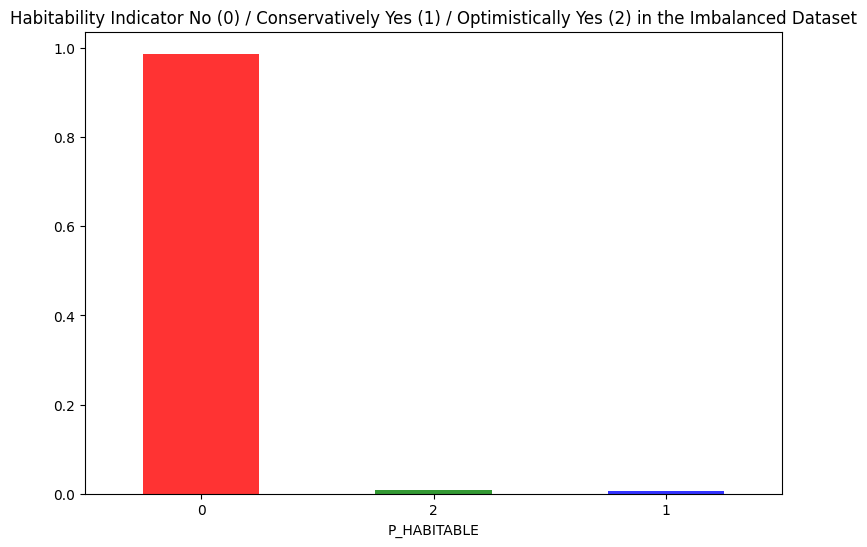

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (9,6))
un_processed.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color= ['red','green','blue'], alpha = 0.8, rot=0)
plt.title('Habitability Indicator No (0) / Conservatively Yes (1) / Optimistically Yes (2) in the Imbalanced Dataset')
plt.show()



In [4]:
un_processed['P_HABITABLE'].value_counts(normalize=True)

P_HABITABLE
0    0.987498
2    0.007323
1    0.005179
Name: proportion, dtype: float64

The data set is imbalanced having 98.64% inhabitable planets. Only 0.84% re conservatively habitable and 0.52% a and optimistically habitable planets. For getting proper performance of the ML models, we need to balance the data set first where each class will be having the same proportion of representation

##Oversampling dataset

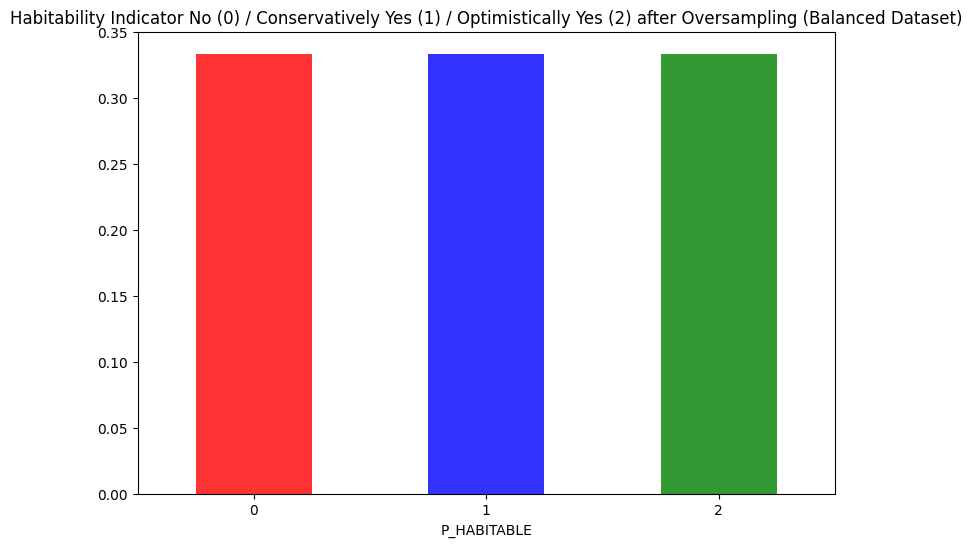

In [5]:
from sklearn.utils import resample

no = un_processed[un_processed.P_HABITABLE == 0]
yes_cons = un_processed[un_processed.P_HABITABLE == 1]
yes_opti = un_processed[un_processed.P_HABITABLE == 2]

yes_cons_oversampled = resample(yes_cons, replace=True, n_samples=len(no), random_state=12345)
oversampled = pd.concat([no, yes_cons_oversampled])

yes_opti_oversampled = resample(yes_opti, replace=True, n_samples=len(no), random_state=12345)
oversampled = pd.concat([oversampled, yes_opti_oversampled])

fig = plt.figure(figsize = (9,6))
oversampled.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color= ['red','blue','green'], alpha = 0.8, rot=0)
plt.title('Habitability Indicator No (0) / Conservatively Yes (1) / Optimistically Yes (2) after Oversampling (Balanced Dataset)')
plt.show()

In [6]:
oversampled['P_HABITABLE'].value_counts(normalize=True)

P_HABITABLE
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

Now each class is having equal proportion of representation in the oversampled data set.

In [7]:
oversampled.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 16587 entries, 0 to 2178
Data columns (total 118 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    P_NAME                       16587 non-null  object 
 1    P_DETECTION                  16587 non-null  object 
 2    P_DISCOVERY_FACILITY         16587 non-null  object 
 3    P_YEAR                       16587 non-null  int64  
 4    P_UPDATE                     16587 non-null  object 
 5    P_MASS                       16580 non-null  float64
 6    P_MASS_ERROR_MIN             8095 non-null   float64
 7    P_MASS_ERROR_MAX             8095 non-null   float64
 8    P_MASS_LIMIT                 16587 non-null  int64  
 9    P_MASS_ORIGIN                16587 non-null  object 
 10   P_RADIUS                     16580 non-null  float64
 11   P_RADIUS_ERROR_MIN           10169 non-null  float64
 12   P_RADIUS_ERROR_MAX           10169 non-null  float64
 13   P_RAD

#Preprocessing data :


##Removing columns with more than 50% null values, and filling categorical variables

In [8]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(50)


,Total,Percent
S_NAME_HD,15216,0.917345
S_NAME_HIP,13103,0.789956
P_OMEGA_ERROR_MIN,10479,0.631760
P_OMEGA_ERROR_MAX,10479,0.631760
P_OMEGA,9925,0.598360
P_ECCENTRICITY_ERROR_MAX,9124,0.550069
P_ECCENTRICITY_ERROR_MIN,9124,0.550069
P_INCLINATION_ERROR_MAX,9079,0.547356
P_INCLINATION_ERROR_MIN,9077,0.547236
P_MASS_ERROR_MIN,8492,0.511967


In [9]:
missing[missing['Percent']>=0.50].index.tolist()    # columns with more than 50 percent null values

['S_NAME_HD',
 'S_NAME_HIP',
 'P_OMEGA_ERROR_MIN',
 'P_OMEGA_ERROR_MAX',
 'P_OMEGA',
 'P_ECCENTRICITY_ERROR_MAX',
 'P_ECCENTRICITY_ERROR_MIN',
 'P_INCLINATION_ERROR_MAX',
 'P_INCLINATION_ERROR_MIN',
 'P_MASS_ERROR_MIN',
 'P_MASS_ERROR_MAX']

In [10]:
compact_data = oversampled.drop(['S_NAME_HD',
 'S_NAME_HIP',
 'P_OMEGA_ERROR_MIN',
 'P_OMEGA_ERROR_MAX',
 'P_OMEGA',
 'P_ECCENTRICITY_ERROR_MAX',
 'P_ECCENTRICITY_ERROR_MIN',
 'P_INCLINATION_ERROR_MAX',
 'P_INCLINATION_ERROR_MIN',
 'P_MASS_ERROR_MIN',
 'P_MASS_ERROR_MAX'], axis = 1)

In [11]:
compact_data.info(verbose=True, show_counts=True)
compact_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 16587 entries, 0 to 2178
Data columns (total 107 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    P_NAME                       16587 non-null  object 
 1    P_DETECTION                  16587 non-null  object 
 2    P_DISCOVERY_FACILITY         16587 non-null  object 
 3    P_YEAR                       16587 non-null  int64  
 4    P_UPDATE                     16587 non-null  object 
 5    P_MASS                       16580 non-null  float64
 6    P_MASS_LIMIT                 16587 non-null  int64  
 7    P_MASS_ORIGIN                16587 non-null  object 
 8    P_RADIUS                     16580 non-null  float64
 9    P_RADIUS_ERROR_MIN           10169 non-null  float64
 10   P_RADIUS_ERROR_MAX           10169 non-null  float64
 11   P_RADIUS_LIMIT               16587 non-null  int64  
 12   P_PERIOD                     16338 non-null  float64
 13   P_PER

,P_YEAR,P_MASS,P_MASS_LIMIT,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_RADIUS_LIMIT,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI
count,16587.000000,16580.000000,16587.000000,16580.000000,10169.000000,10169.000000,16587.000000,1.633800e+04,1.571900e+04,1.571900e+04,...,16354.000000,16354.000000,16354.000000,16354.000000,1.636400e+04,16583.000000,16587.000000,16587.000000,16587.000000,16346.000000
mean,2016.936396,152.607200,0.057455,3.045658,-0.245438,0.287975,-0.000241,2.622339e+04,-6.952858e+03,3.044578e+04,...,1.018721,0.543486,1.018721,1.560196,3.332802e+34,0.351376,0.678363,0.416471,1.000000,0.586139
std,3.735544,1391.482183,0.235293,3.662712,0.617517,0.987997,0.015528,3.146537e+06,7.988044e+05,3.748934e+06,...,2.793387,1.462523,2.793387,4.143788,3.014575e+36,0.096248,0.467119,0.492988,0.816521,0.258836
min,1992.000000,0.020000,-1.000000,0.310000,-32.506000,0.000000,-1.000000,9.070629e-02,-1.000000e+08,0.000000e+00,...,0.001910,0.000911,0.001910,0.002434,4.356319e-05,0.029269,0.000000,0.000000,0.000000,0.023896
25%,2014.000000,2.210000,0.000000,1.340000,-0.230000,0.080000,0.000000,1.077000e+01,-1.303000e-02,7.076500e-05,...,0.205273,0.101223,0.205273,0.272812,2.061596e-02,0.277482,0.000000,0.000000,0.000000,0.304004
50%,2016.000000,4.590000,0.000000,1.830000,-0.130000,0.140000,0.000000,2.563058e+01,-9.380000e-04,9.180000e-04,...,0.464062,0.233579,0.464062,0.632942,5.373480e-02,0.360653,1.000000,0.000000,1.000000,0.659005
75%,2020.000000,7.950000,0.000000,2.490000,-0.070000,0.270000,0.000000,8.682899e+01,-7.141000e-05,1.303000e-02,...,1.229069,0.662185,1.229069,1.896111,7.129277e-01,0.437211,1.000000,1.000000,2.000000,0.802188
max,2024.000000,89700.000000,1.000000,77.342000,0.000000,68.910000,0.000000,4.020000e+08,0.000000e+00,4.700000e+08,...,120.348830,67.331558,120.348830,214.468620,2.726899e+38,1.003328,1.000000,1.000000,2.000000,0.968362


##Impute categorical data

Identify columns with categorical data


In [12]:
compact_data.select_dtypes(include=['object']).columns

Index(['P_NAME', 'P_DETECTION', 'P_DISCOVERY_FACILITY', 'P_UPDATE',
       'P_MASS_ORIGIN', 'S_NAME', 'S_TYPE', 'S_RA_STR', 'S_DEC_STR', 'P_TYPE',
       'S_TYPE_TEMP', 'S_RA_TXT', 'S_DEC_TXT', 'P_TYPE_TEMP',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object')

In [13]:
compact_data_obj = compact_data.select_dtypes(include=['object'])     # dataframe of categorical objects

In [14]:
total = compact_data_obj.isnull().sum().sort_values(ascending=False)
percent = (compact_data_obj.isnull().sum()/compact_data_obj.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
S_TYPE,7180,0.432869
P_TYPE_TEMP,234,0.014107
S_TYPE_TEMP,194,0.011696
P_TYPE,7,0.000422
P_NAME,0,0.000000


Fill missing categorical data

In [15]:
compact_data['S_TYPE'] = compact_data['S_TYPE'].fillna(compact_data['S_TYPE'].mode()[0])
compact_data['P_TYPE_TEMP'] = compact_data['P_TYPE_TEMP'].fillna(compact_data['P_TYPE_TEMP'].mode()[0])
compact_data['S_TYPE_TEMP'] = compact_data['S_TYPE_TEMP'].fillna(compact_data['S_TYPE_TEMP'].mode()[0])
compact_data['P_TYPE'] = compact_data['P_TYPE'].fillna(compact_data['P_TYPE'].mode()[0])

In [16]:
compact_data_obj.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 16587 entries, 0 to 2178
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   P_NAME                16587 non-null  object
 1   P_DETECTION           16587 non-null  object
 2   P_DISCOVERY_FACILITY  16587 non-null  object
 3   P_UPDATE              16587 non-null  object
 4   P_MASS_ORIGIN         16587 non-null  object
 5   S_NAME                16587 non-null  object
 6   S_TYPE                9407 non-null   object
 7   S_RA_STR              16587 non-null  object
 8   S_DEC_STR             16587 non-null  object
 9   P_TYPE                16580 non-null  object
 10  S_TYPE_TEMP           16393 non-null  object
 11  S_RA_TXT              16587 non-null  object
 12  S_DEC_TXT             16587 non-null  object
 13  P_TYPE_TEMP           16353 non-null  object
 14  S_CONSTELLATION       16587 non-null  object
 15  S_CONSTELLATION_ABR   16587 non-null  obje

##Encoding categorical variables

In [17]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in compact_data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    compact_data[col] = lencoders[col].fit_transform(compact_data[col])

Pickling the encoders to be used while deploying and encoding new values for categorical data used for predicting
Each encoder specific to each categorical feature is stored in a dictionary of encoders, accessed by the feature name, to transform any categorical variable of the feature with the same encoding

In [18]:
import joblib
joblib.dump(lencoders, 'lencoders.pkl')

['lencoders.pkl']

##Imputing values of entire dataset

Imputing the missing values for entire data set (actually only the numeric ones, because we imputed the categorical ones using mode earlier) using MICE package.

In [19]:
from sklearn.experimental import enable_iterative_imputer     # Multiple Imputation by Chained Equations
from sklearn.impute import IterativeImputer
MiceImputed = compact_data.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(compact_data)


In [20]:
MiceImputed.head()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_LIMIT,P_MASS_ORIGIN,P_RADIUS,P_RADIUS_ERROR_MIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,4865,4,43,2020,139,250.00,0,1,13.90,-3.401674,...,3.332802e+34,0.214133,0,0,2,0,-4156.897695,72,71,63
1,3547,9,27,2013,89,16.60,0,1,2.90,-0.280000,...,2.097783e+00,0.316980,0,0,1,0,0.272032,30,30,75
2,4504,9,27,2016,106,5.10,0,0,2.11,-0.180000,...,1.756317e+00,0.459559,0,0,1,0,0.254763,51,51,49
3,1584,9,21,2018,120,12.20,0,0,3.52,-0.160000,...,5.683741e-01,0.443760,0,0,1,0,0.193906,65,66,26
4,4015,9,27,2016,106,4.94,0,0,2.07,-0.120000,...,7.685024e-01,0.386150,0,0,1,0,0.276721,51,51,49


##Checking correlations

Checking whether perfect correlation exists among any feature pair. Removing highly correlated features reduces the dimensionality of the dataset, making it more efficient to process

Creating heatmap :

<Axes: >

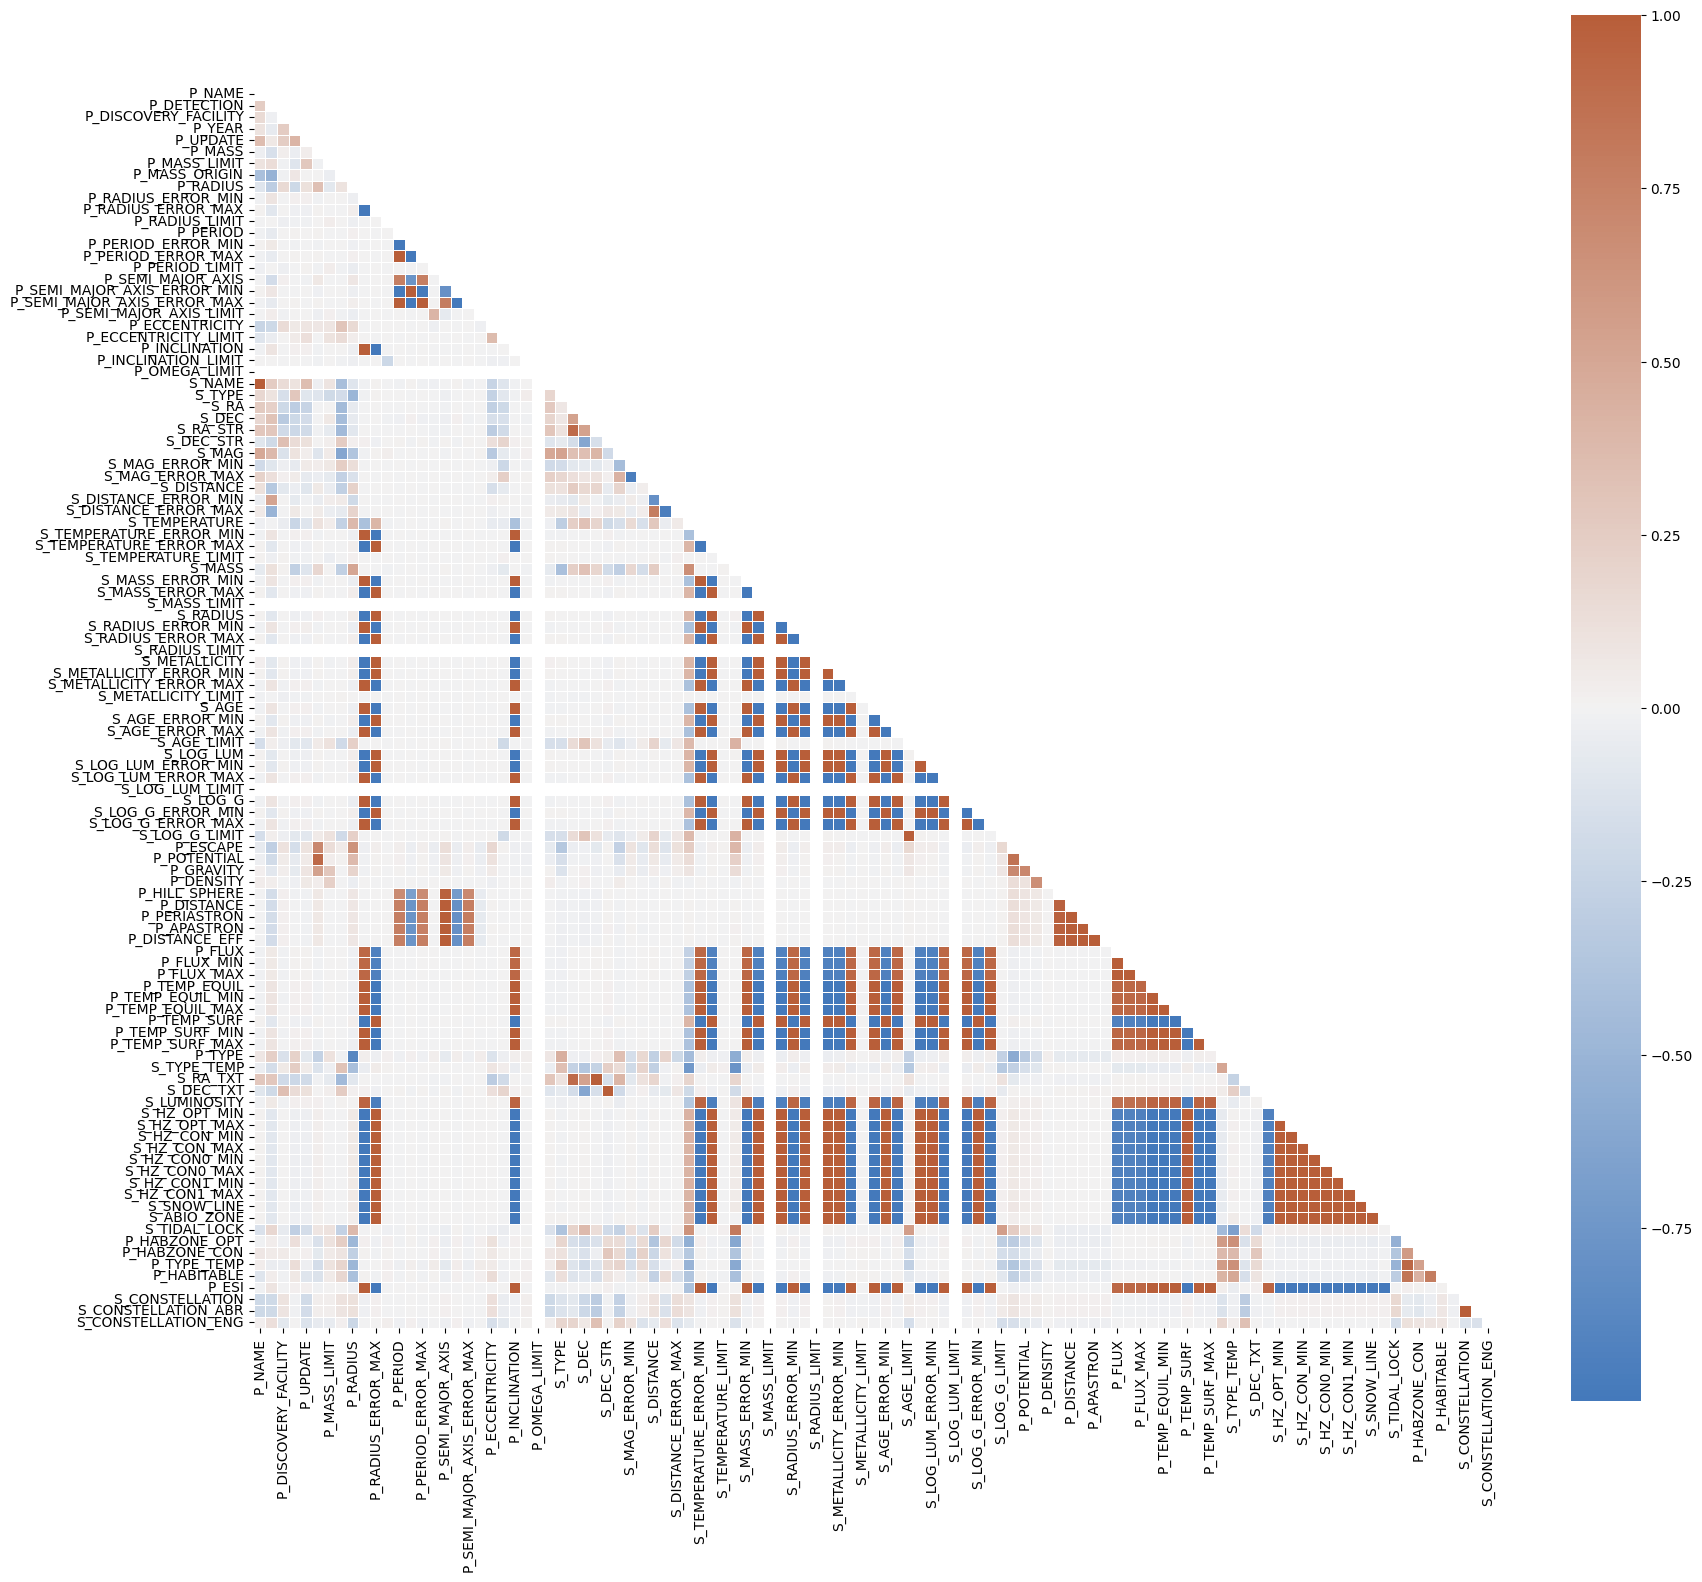

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=False, linewidths=.5, cbar_kws={"shrink": 0.9})

In [22]:
from scipy.stats import pearsonr

corr_matrix = MiceImputed.corr(method='pearson')  # Pearson correlation matrix for numerical features

threshold = 0.999          # Setting a threshold for near-perfect correlation
highly_correlated = set()  # Use a set to store unique feature pairs having high correlation


for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:  # Avoid comparing a feature with itself
            corr, _ = pearsonr(MiceImputed[col1], MiceImputed[col2])  # Calculate correlation
            if abs(corr) >= threshold:
                highly_correlated.add(tuple(sorted([col1, col2])))

features_to_remove = []
for feature_pair in highly_correlated:
    features_to_remove.append(feature_pair[0])  # Remove the first feature in the pair

features_to_remove


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


['P_FLUX',
 'S_ABIO_ZONE',
 'P_PERIASTRON',
 'P_TEMP_EQUIL_MAX',
 'P_TEMP_SURF',
 'P_TEMP_EQUIL_MIN',
 'S_RADIUS',
 'S_LOG_G_ERROR_MAX',
 'P_ESI',
 'S_AGE',
 'S_AGE',
 'P_ESI',
 'S_HZ_CON_MIN',
 'P_ESI',
 'S_METALLICITY_ERROR_MIN',
 'S_RADIUS_ERROR_MIN',
 'P_TEMP_EQUIL_MAX',
 'S_HZ_CON0_MIN',
 'S_ABIO_ZONE',
 'P_TEMP_EQUIL_MAX',
 'S_AGE',
 'P_INCLINATION',
 'P_TEMP_SURF_MAX',
 'P_TEMP_SURF_MAX',
 'S_RADIUS',
 'P_TEMP_EQUIL_MIN',
 'P_TEMP_SURF',
 'S_MASS_ERROR_MIN',
 'P_TEMP_EQUIL_MIN',
 'P_ESI',
 'P_TEMP_EQUIL_MAX',
 'P_RADIUS_ERROR_MAX',
 'S_AGE',
 'P_RADIUS_ERROR_MIN',
 'S_METALLICITY_ERROR_MIN',
 'S_LOG_LUM',
 'S_HZ_CON1_MIN',
 'P_ESI',
 'P_TEMP_EQUIL',
 'S_MASS_ERROR_MIN',
 'P_TEMP_SURF',
 'P_TEMP_SURF_MAX',
 'P_TEMP_EQUIL_MAX',
 'P_ESI',
 'P_INCLINATION',
 'P_TEMP_SURF',
 'S_LOG_G',
 'P_TEMP_EQUIL_MIN',
 'S_HZ_CON_MIN',
 'P_TEMP_SURF_MAX',
 'P_ESI',
 'S_AGE',
 'S_LOG_G',
 'P_RADIUS_ERROR_MAX',
 'P_RADIUS_ERROR_MIN',
 'P_RADIUS_ERROR_MIN',
 'S_LOG_LUM',
 'S_LOG_LUM_ERROR_MIN',
 'S_

In [23]:
features_to_remove=set(features_to_remove)
print("Total features having high correlation: ", len(features_to_remove))
features_to_remove

Total features having high correlation:  47


{'P_APASTRON',
 'P_DISTANCE',
 'P_DISTANCE_EFF',
 'P_ESI',
 'P_FLUX',
 'P_FLUX_MAX',
 'P_INCLINATION',
 'P_PERIASTRON',
 'P_PERIOD',
 'P_RADIUS_ERROR_MAX',
 'P_RADIUS_ERROR_MIN',
 'P_TEMP_EQUIL',
 'P_TEMP_EQUIL_MAX',
 'P_TEMP_EQUIL_MIN',
 'P_TEMP_SURF',
 'P_TEMP_SURF_MAX',
 'P_TEMP_SURF_MIN',
 'S_ABIO_ZONE',
 'S_AGE',
 'S_AGE_ERROR_MAX',
 'S_AGE_ERROR_MIN',
 'S_AGE_LIMIT',
 'S_DEC_STR',
 'S_HZ_CON0_MAX',
 'S_HZ_CON0_MIN',
 'S_HZ_CON1_MAX',
 'S_HZ_CON1_MIN',
 'S_HZ_CON_MAX',
 'S_HZ_CON_MIN',
 'S_HZ_OPT_MAX',
 'S_HZ_OPT_MIN',
 'S_LOG_G',
 'S_LOG_G_ERROR_MAX',
 'S_LOG_G_ERROR_MIN',
 'S_LOG_LUM',
 'S_LOG_LUM_ERROR_MAX',
 'S_LOG_LUM_ERROR_MIN',
 'S_MASS_ERROR_MAX',
 'S_MASS_ERROR_MIN',
 'S_METALLICITY',
 'S_METALLICITY_ERROR_MAX',
 'S_METALLICITY_ERROR_MIN',
 'S_RADIUS',
 'S_RADIUS_ERROR_MAX',
 'S_RADIUS_ERROR_MIN',
 'S_RA_STR',
 'S_TEMPERATURE_ERROR_MAX'}

In [24]:
all_cols = MiceImputed.columns.tolist()

cols_rem = list(set(all_cols)-features_to_remove)
print("Remaining features after removing correlated features: ", len(cols_rem))
cols_rem

Remaining features after removing correlated features:  60


['S_DISTANCE',
 'S_DISTANCE_ERROR_MIN',
 'S_SNOW_LINE',
 'P_TYPE',
 'S_TEMPERATURE_LIMIT',
 'P_SEMI_MAJOR_AXIS',
 'S_MASS',
 'S_CONSTELLATION_ENG',
 'S_TEMPERATURE_ERROR_MIN',
 'P_ESCAPE',
 'S_DISTANCE_ERROR_MAX',
 'P_FLUX_MIN',
 'S_LOG_LUM_LIMIT',
 'S_MAG_ERROR_MAX',
 'P_HABZONE_OPT',
 'S_RA',
 'P_DENSITY',
 'S_DEC',
 'P_DISCOVERY_FACILITY',
 'P_ECCENTRICITY_LIMIT',
 'S_MASS_LIMIT',
 'S_CONSTELLATION_ABR',
 'P_NAME',
 'P_HABITABLE',
 'S_RADIUS_LIMIT',
 'P_SEMI_MAJOR_AXIS_ERROR_MAX',
 'P_RADIUS_LIMIT',
 'P_ECCENTRICITY',
 'P_MASS',
 'P_PERIOD_ERROR_MAX',
 'P_PERIOD_LIMIT',
 'P_SEMI_MAJOR_AXIS_ERROR_MIN',
 'S_TYPE',
 'P_TYPE_TEMP',
 'S_TIDAL_LOCK',
 'P_HABZONE_CON',
 'S_TEMPERATURE',
 'P_INCLINATION_LIMIT',
 'P_UPDATE',
 'S_RA_TXT',
 'S_DEC_TXT',
 'S_MAG',
 'P_GRAVITY',
 'S_LUMINOSITY',
 'P_SEMI_MAJOR_AXIS_LIMIT',
 'S_CONSTELLATION',
 'S_METALLICITY_LIMIT',
 'P_YEAR',
 'S_LOG_G_LIMIT',
 'P_HILL_SPHERE',
 'P_POTENTIAL',
 'P_DETECTION',
 'P_PERIOD_ERROR_MIN',
 'P_MASS_ORIGIN',
 'S_NAME',


In [25]:
list(features_to_remove)

['S_LOG_G',
 'S_AGE_ERROR_MIN',
 'S_HZ_CON_MIN',
 'S_LOG_LUM',
 'S_RADIUS_ERROR_MIN',
 'S_AGE',
 'S_METALLICITY_ERROR_MAX',
 'S_MASS_ERROR_MIN',
 'S_MASS_ERROR_MAX',
 'P_FLUX',
 'S_RADIUS',
 'S_HZ_CON_MAX',
 'S_HZ_CON0_MAX',
 'S_ABIO_ZONE',
 'S_RADIUS_ERROR_MAX',
 'S_AGE_ERROR_MAX',
 'P_RADIUS_ERROR_MIN',
 'P_RADIUS_ERROR_MAX',
 'P_PERIOD',
 'P_ESI',
 'P_TEMP_SURF',
 'P_TEMP_SURF_MIN',
 'P_APASTRON',
 'P_PERIASTRON',
 'S_LOG_G_ERROR_MAX',
 'P_INCLINATION',
 'P_DISTANCE',
 'S_RA_STR',
 'S_AGE_LIMIT',
 'S_HZ_CON0_MIN',
 'P_DISTANCE_EFF',
 'S_LOG_LUM_ERROR_MIN',
 'P_TEMP_EQUIL',
 'S_HZ_CON1_MAX',
 'S_DEC_STR',
 'P_TEMP_EQUIL_MAX',
 'S_HZ_CON1_MIN',
 'S_HZ_OPT_MAX',
 'S_TEMPERATURE_ERROR_MAX',
 'S_LOG_LUM_ERROR_MAX',
 'S_METALLICITY_ERROR_MIN',
 'P_FLUX_MAX',
 'P_TEMP_SURF_MAX',
 'S_METALLICITY',
 'P_TEMP_EQUIL_MIN',
 'S_LOG_G_ERROR_MIN',
 'S_HZ_OPT_MIN']

In [26]:
working_data = MiceImputed.drop(features_to_remove, axis=1)
working_data.info(verbose=True, show_counts=True)
print("Working data after removing correlated features")
working_data

<class 'pandas.core.frame.DataFrame'>
Index: 16587 entries, 0 to 2178
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       16587 non-null  int64  
 1   P_DETECTION                  16587 non-null  int64  
 2   P_DISCOVERY_FACILITY         16587 non-null  int64  
 3   P_YEAR                       16587 non-null  int64  
 4   P_UPDATE                     16587 non-null  int64  
 5   P_MASS                       16587 non-null  float64
 6   P_MASS_LIMIT                 16587 non-null  int64  
 7   P_MASS_ORIGIN                16587 non-null  int64  
 8   P_RADIUS                     16587 non-null  float64
 9   P_RADIUS_LIMIT               16587 non-null  int64  
 10  P_PERIOD_ERROR_MIN           16587 non-null  float64
 11  P_PERIOD_ERROR_MAX           16587 non-null  float64
 12  P_PERIOD_LIMIT               16587 non-null  int64  
 13  P_SEMI_MAJOR_AXIS     

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_LIMIT,P_MASS_ORIGIN,P_RADIUS,P_RADIUS_LIMIT,...,S_LUMINOSITY,S_SNOW_LINE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,4865,4,43,2020,139,250.00,0,1,13.90,0,...,0.577784,2.010068,0.214133,0,0,2,0,72,71,63
1,3547,9,27,2013,89,16.60,0,1,2.90,0,...,0.814704,2.437046,0.316980,0,0,1,0,30,30,75
2,4504,9,27,2016,106,5.10,0,0,2.11,0,...,1.096478,2.827247,0.459559,0,0,1,0,51,51,49
3,1584,9,21,2018,120,12.20,0,0,3.52,0,...,0.299226,1.476943,0.443760,0,0,1,0,65,66,26
4,4015,9,27,2016,106,4.94,0,0,2.07,0,...,0.424620,1.759397,0.386150,0,0,1,0,51,51,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,2841,9,27,2016,106,4.16,0,0,1.87,0,...,0.769130,2.367902,0.452789,1,0,2,2,30,30,75
5189,1631,9,21,2016,179,5.48,0,0,2.20,0,...,0.008610,0.250532,0.298176,1,0,2,2,11,22,18
1731,2864,9,27,2017,89,5.35,0,0,2.17,0,...,0.231206,1.298266,0.450558,1,1,2,2,30,30,75
3588,198,8,29,2013,54,6.80,0,3,2.50,0,...,0.019588,0.377889,0.355307,1,0,2,2,32,32,32


<Axes: >

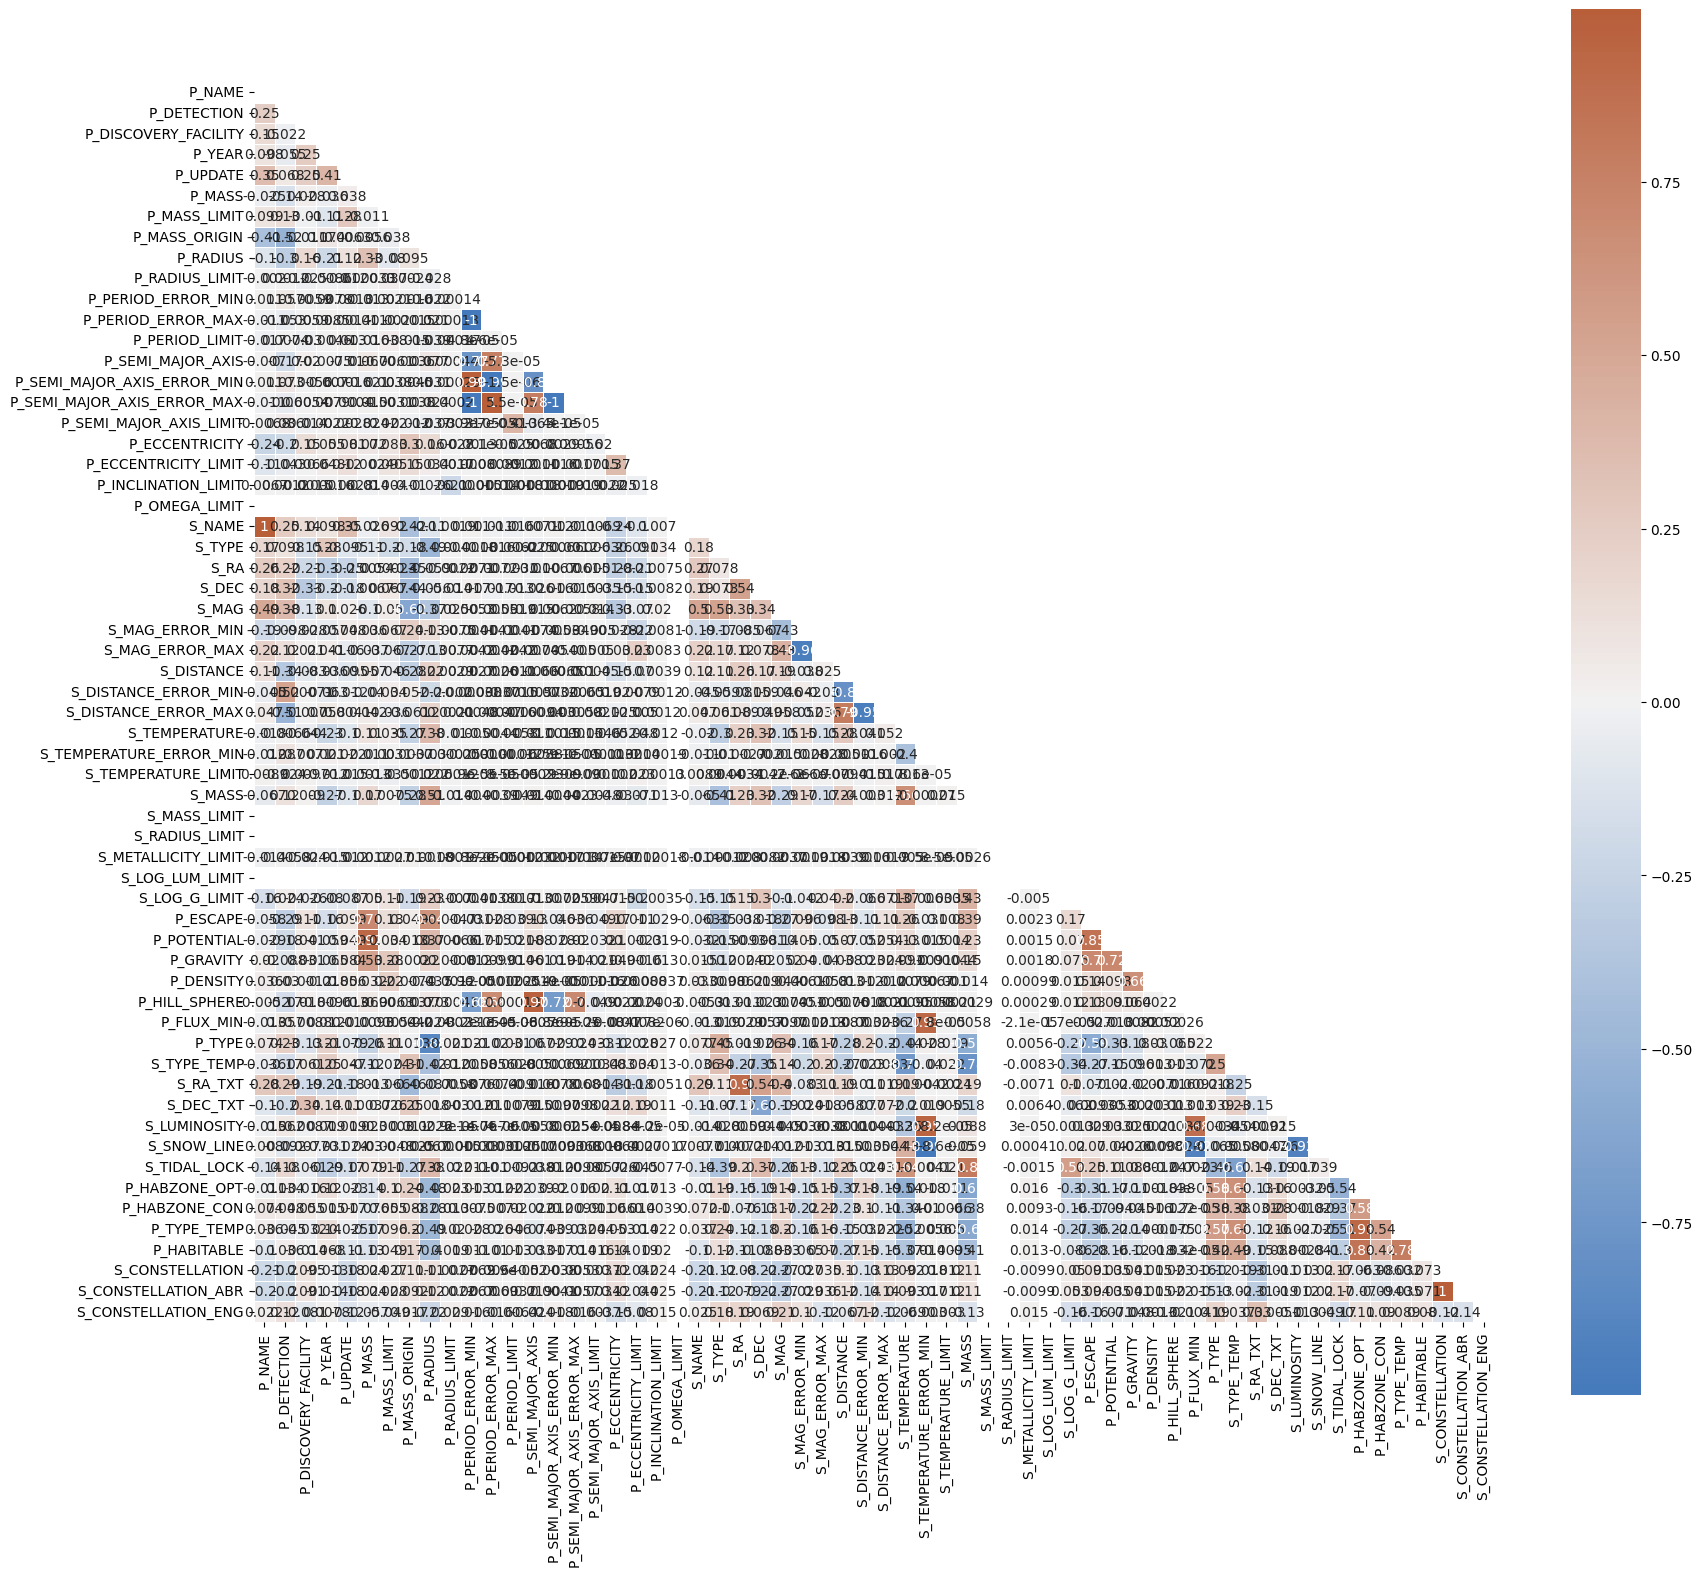

In [27]:
# Correlation heatmap for working data
corr = working_data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": 0.9})

##Identifying and Removing outliers


In [28]:
Q1 = working_data.quantile(0.25)
Q3 = working_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


P_NAME                         3546.000000
P_DETECTION                       1.000000
P_DISCOVERY_FACILITY             13.000000
P_YEAR                            6.000000
P_UPDATE                        146.000000
P_MASS                            5.785000
P_MASS_LIMIT                      0.000000
P_MASS_ORIGIN                     3.000000
P_RADIUS                          1.150000
P_RADIUS_LIMIT                    0.000000
P_PERIOD_ERROR_MIN                0.026910
P_PERIOD_ERROR_MAX                0.024910
P_PERIOD_LIMIT                    0.000000
P_SEMI_MAJOR_AXIS                 0.249900
P_SEMI_MAJOR_AXIS_ERROR_MIN       0.260888
P_SEMI_MAJOR_AXIS_ERROR_MAX       0.526229
P_SEMI_MAJOR_AXIS_LIMIT           0.000000
P_ECCENTRICITY                    0.100000
P_ECCENTRICITY_LIMIT              0.000000
P_INCLINATION_LIMIT               0.000000
P_OMEGA_LIMIT                     0.000000
S_NAME                         2546.000000
S_TYPE                           39.000000
S_RA       

In [29]:
# Removing outliers from dataset
# from calculated IQR, for each row, the values are checked for any outliers
# if atleast one of them is outlier the row is negated(~) and excluded from the dataset
#   any(axis=1): This function plays a key role in the iterative aspect.
#   axis=1: This specifies that the any function operates along columns (axis 1) for each row in the working_data array.

working_data = working_data[~((working_data < (Q1 - 1.5 * IQR)) |(working_data > (Q3 + 1.5 * IQR))).any(axis=1)]



#Feature Selection :

After completion of data preprocessing, we will select the really important features which are contributing towards habitability of the exoplanets. We will use permutation importance using Random Forest and wrapper method using Random Forest as well as Extra Trees classifier.



In [30]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=c39ac17a0d419574de2bc9c1eb83f73d7a5270fb3b0798139d10ec9808499e3b
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [31]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier as rf

X = working_data.drop('P_HABITABLE', axis=1)
y = working_data['P_HABITABLE']
perm = PermutationImportance(rf(n_estimators=10, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())


Weight,Feature
0.0057 ± 0.0027,P_FLUX_MIN
0.0029 ± 0.0013,P_HABZONE_OPT
0.0009 ± 0.0012,P_HILL_SPHERE
0.0005 ± 0.0006,S_MASS
0 ± 0.0000,P_MASS
0 ± 0.0000,S_DEC
0 ± 0.0000,S_RA
0 ± 0.0000,S_TYPE
0 ± 0.0000,S_NAME
0 ± 0.0000,P_OMEGA_LIMIT


In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

#X = working_data.drop('P_HABITABLE', axis=1)
#y = MiceImputed['P_HABITABLE']
selector = SelectFromModel(rf(n_estimators=1000, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=1000, random_state=0).fit(X,y).feature_importances_)



['P_MASS', 'P_RADIUS', 'S_MASS', 'P_ESCAPE', 'P_POTENTIAL', 'P_DENSITY', 'P_HILL_SPHERE', 'P_FLUX_MIN', 'P_TYPE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'S_CONSTELLATION', 'S_CONSTELLATION_ABR']
[1.36087394e-03 3.36750118e-06 1.00859707e-04 8.36497336e-03
 5.28235205e-04 9.91068774e-02 0.00000000e+00 7.35948476e-05
 1.16258129e-01 0.00000000e+00 5.66713410e-03 4.84886645e-03
 0.00000000e+00 1.59500821e-02 3.30439515e-03 3.40232499e-03
 0.00000000e+00 8.04370581e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.45145620e-03 3.09244086e-03 6.54010552e-03
 4.12187340e-03 5.24149299e-03 1.65906309e-03 1.50069934e-03
 7.84311665e-03 1.72576513e-03 2.34670270e-03 1.38612489e-02
 4.63478114e-03 0.00000000e+00 1.97346426e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.03089045e-01 7.89623958e-02 1.64784702e-02 1.17070566e-01
 4.44931709e-02 4.29738898e-02 7.02356212e-02 1.64922765e-03
 7.75875077e-03 3.49899649e-03 1.18715157e-02 1.26929584e-02
 2.

In [33]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier as et

#X = working_data.drop('P_HABITABLE', axis=1)
#y = MiceImputed['P_HABITABLE']
selector = SelectFromModel(et(n_estimators=1000, random_state=123))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(et(n_estimators=100, random_state=123).fit(X,y).feature_importances_)


['P_MASS', 'P_RADIUS', 'S_MASS', 'P_ESCAPE', 'P_POTENTIAL', 'P_DENSITY', 'P_HILL_SPHERE', 'P_FLUX_MIN', 'P_TYPE', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'S_CONSTELLATION', 'S_CONSTELLATION_ABR']
[0.00786596 0.00135155 0.00146638 0.01138621 0.00157397 0.05614311
 0.         0.00407976 0.07975206 0.         0.00482808 0.00782729
 0.         0.00982031 0.00699717 0.00424507 0.         0.00322307
 0.         0.         0.         0.00781949 0.01550855 0.00842564
 0.00799377 0.0061581  0.00321675 0.00329945 0.00471821 0.00134382
 0.00352293 0.01228711 0.01202016 0.         0.0148402  0.
 0.         0.         0.         0.         0.06705771 0.05190125
 0.01154812 0.10386986 0.01910525 0.01722623 0.1904916  0.00593076
 0.00493131 0.01179549 0.00985287 0.0072885  0.0179009  0.05617663
 0.00633769 0.06086222 0.03033321 0.02434076 0.0013355 ]


##Probability density of selected features
The features selected using feature selection methods above are chosen as probable features for training

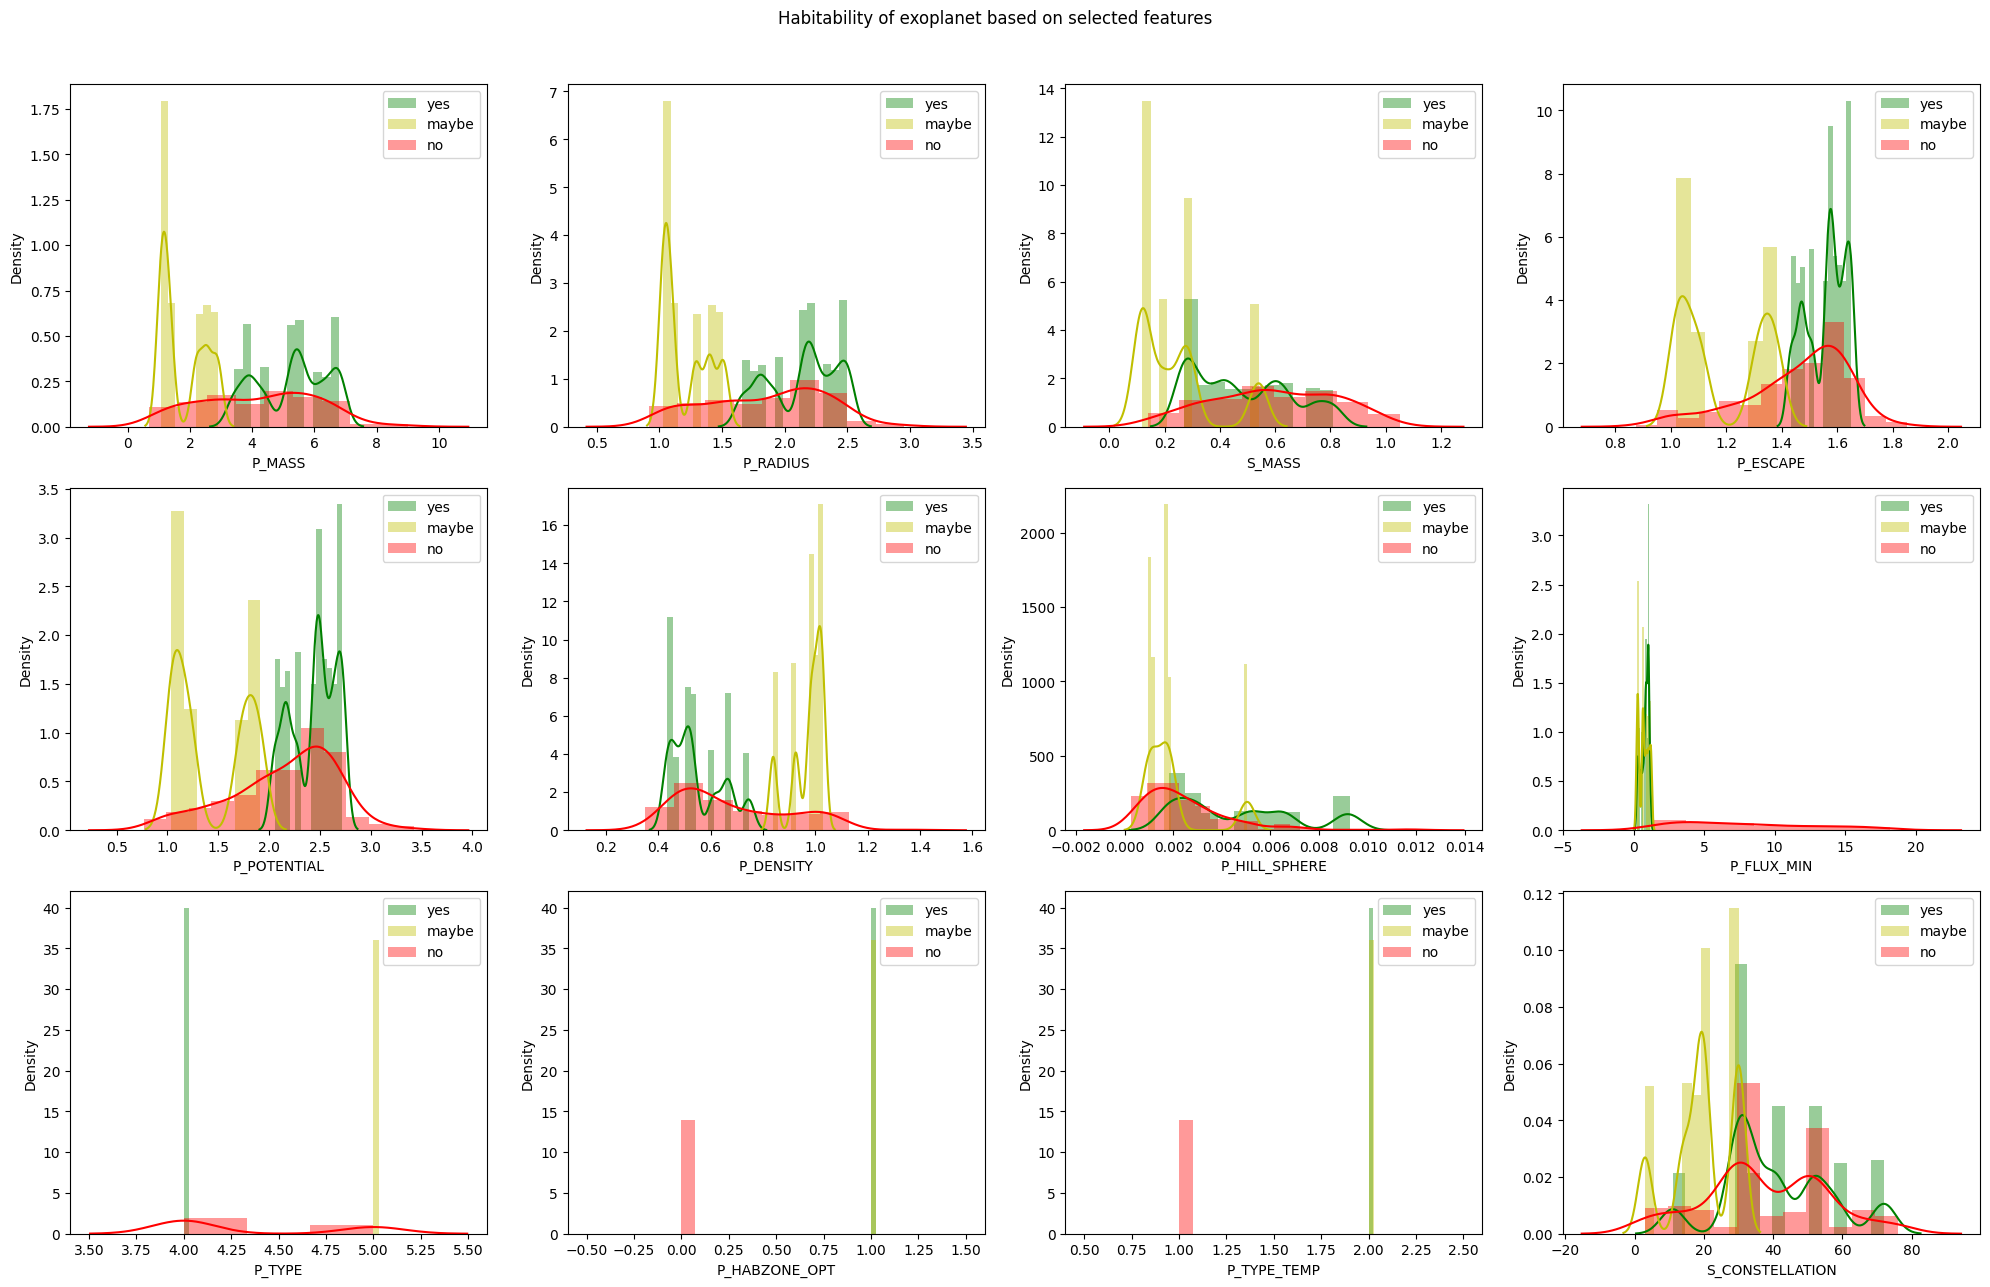

In [34]:
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize = (20, 25))
j = 0
probable_features = ['P_MASS', 'P_RADIUS', 'S_MASS', 'P_ESCAPE', 'P_POTENTIAL', 'P_DENSITY', 'P_HILL_SPHERE', 'P_FLUX_MIN', 'P_TYPE', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'S_CONSTELLATION']
for i in probable_features:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(working_data[i][working_data['P_HABITABLE']==2], color='g', label = 'yes')
    sns.distplot(working_data[i][working_data['P_HABITABLE']==1], color='y', label = 'maybe')
    sns.distplot(working_data[i][working_data['P_HABITABLE']==0], color='r', label = 'no')
    plt.legend(loc='best')
fig.suptitle('Habitability of exoplanet based on selected features')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

The plot shows the probability density function of each probable feature.
- All features except P_HABZONE_OPT --the conservative habitable zone flag(planet is in conservative habitable zone or not) can be used for training the model

The selected probable features display evident features for predicting habitability
P_TYPE_TEMP is not excluded because it is an encoded categorical variable


In [35]:
probable_features.remove('P_HABZONE_OPT')

selected_features = probable_features
selected_features

['P_MASS',
 'P_RADIUS',
 'S_MASS',
 'P_ESCAPE',
 'P_POTENTIAL',
 'P_DENSITY',
 'P_HILL_SPHERE',
 'P_FLUX_MIN',
 'P_TYPE',
 'P_TYPE_TEMP',
 'S_CONSTELLATION']

In [36]:
sample_working_data = working_data[['P_MASS',
 'P_RADIUS',
 'S_MASS',
 'P_ESCAPE',
 'P_POTENTIAL',
 'P_DENSITY',
 'P_HILL_SPHERE',
 'P_FLUX_MIN',
 'P_TYPE',
 'P_TYPE_TEMP',
 'S_CONSTELLATION','P_HABITABLE']]


In [37]:
habitable_features_values = sample_working_data[sample_working_data['P_HABITABLE']==2]
sorted_df = habitable_features_values.sort_index()
sorted_df

,P_MASS,P_RADIUS,S_MASS,P_ESCAPE,P_POTENTIAL,P_DENSITY,P_HILL_SPHERE,P_FLUX_MIN,P_TYPE,P_TYPE_TEMP,S_CONSTELLATION,P_HABITABLE
113,5.34,2.167,0.56,1.569789,2.464236,0.524765,0.006618,0.524434,4,2,52,2
113,5.34,2.167,0.56,1.569789,2.464236,0.524765,0.006618,0.524434,4,2,52,2
113,5.34,2.167,0.56,1.569789,2.464236,0.524765,0.006618,0.524434,4,2,52,2
113,5.34,2.167,0.56,1.569789,2.464236,0.524765,0.006618,0.524434,4,2,52,2
113,5.34,2.167,0.56,1.569789,2.464236,0.524765,0.006618,0.524434,4,2,52,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5189,5.48,2.200,0.27,1.578261,2.490909,0.514651,0.002344,1.166543,4,2,11,2
5189,5.48,2.200,0.27,1.578261,2.490909,0.514651,0.002344,1.166543,4,2,11,2
5189,5.48,2.200,0.27,1.578261,2.490909,0.514651,0.002344,1.166543,4,2,11,2
5189,5.48,2.200,0.27,1.578261,2.490909,0.514651,0.002344,1.166543,4,2,11,2


In [38]:
'''
loaded_encoders = joblib.load('lencoders.pkl')            # checking working of decoding encoded data

p_type_encoder = loaded_encoders['P_TYPE']
print(np.unique(p_type_encoder.inverse_transform(sample_working_data['P_TYPE'])))

p_type_temp_encoder = loaded_encoders['P_TYPE_TEMP']
print(np.unique(p_type_temp_encoder.inverse_transform(sample_working_data['P_TYPE_TEMP'])))


p_type_temp_encoder = loaded_encoders['P_TYPE_TEMP']
print(np.unique(p_type_temp_encoder.inverse_transform(sample_working_data['P_TYPE_TEMP'])))


s_constellation_encoder = loaded_encoders['S_CONSTELLATION']
print(np.unique(s_constellation_encoder.inverse_transform(sample_working_data['S_CONSTELLATION'])))
'''

"\nloaded_encoders = joblib.load('lencoders.pkl')            # checking working of decoding encoded data\n\np_type_encoder = loaded_encoders['P_TYPE']\nprint(np.unique(p_type_encoder.inverse_transform(sample_working_data['P_TYPE'])))\n\np_type_temp_encoder = loaded_encoders['P_TYPE_TEMP']\nprint(np.unique(p_type_temp_encoder.inverse_transform(sample_working_data['P_TYPE_TEMP'])))\n\n\np_type_temp_encoder = loaded_encoders['P_TYPE_TEMP']\nprint(np.unique(p_type_temp_encoder.inverse_transform(sample_working_data['P_TYPE_TEMP'])))\n\n\ns_constellation_encoder = loaded_encoders['S_CONSTELLATION']\nprint(np.unique(s_constellation_encoder.inverse_transform(sample_working_data['S_CONSTELLATION'])))\n"

In [39]:
sample_working_data[sample_working_data['P_HABITABLE']==2].describe()


,P_MASS,P_RADIUS,S_MASS,P_ESCAPE,P_POTENTIAL,P_DENSITY,P_HILL_SPHERE,P_FLUX_MIN,P_TYPE,P_TYPE_TEMP,S_CONSTELLATION,P_HABITABLE
count,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000,1670.0,1670.0,1670.000000,1670.0
mean,5.271631,2.137618,0.480707,1.559835,2.438095,0.548894,0.004687,0.794272,4.0,2.0,40.791018,2.0
std,1.116755,0.273985,0.175592,0.070797,0.218868,0.098543,0.002501,0.278382,0.0,0.0,15.586902,0.0
min,3.410000,1.660000,0.270000,1.433254,2.054217,0.435200,0.001802,0.267900,4.0,2.0,11.000000,2.0
25%,4.400000,1.930000,0.290000,1.509898,2.279793,0.476083,0.002344,0.524434,4.0,2.0,30.000000,2.0
50%,5.340000,2.167000,0.430000,1.569789,2.464236,0.524765,0.003669,0.894316,4.0,2.0,41.000000,2.0
75%,6.100000,2.340000,0.600000,1.614570,2.606838,0.612041,0.006404,1.046102,4.0,2.0,52.000000,2.0
max,6.800000,2.500000,0.810000,1.649242,2.720000,0.745470,0.009255,1.166543,4.0,2.0,72.000000,2.0


In [40]:
sample_working_data[sample_working_data['P_HABITABLE']==1].describe()

,P_MASS,P_RADIUS,S_MASS,P_ESCAPE,P_POTENTIAL,P_DENSITY,P_HILL_SPHERE,P_FLUX_MIN,P_TYPE,P_TYPE_TEMP,S_CONSTELLATION,P_HABITABLE
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.0,1336.0,1336.000000,1336.0
mean,1.782073,1.207395,0.242051,1.184151,1.423855,0.970222,0.001973,0.723070,5.0,2.0,19.586826,1.0
std,0.704485,0.181337,0.142327,0.147167,0.353123,0.062778,0.001343,0.342541,0.0,0.0,8.793253,0.0
min,1.070000,1.030000,0.120000,1.019232,1.038835,0.839396,0.000951,0.258159,5.0,2.0,3.000000,1.0
25%,1.170000,1.052500,0.120000,1.053989,1.111193,0.925656,0.001131,0.324356,5.0,2.0,14.000000,1.0
50%,1.360000,1.100000,0.200000,1.111919,1.236364,0.988353,0.001658,0.673236,5.0,2.0,20.000000,1.0
75%,2.540000,1.400000,0.290000,1.346954,1.814286,1.021788,0.001902,1.051338,5.0,2.0,30.000000,1.0
max,2.890000,1.510000,0.540000,1.383440,1.913907,1.029492,0.005038,1.226057,5.0,2.0,30.000000,1.0


In [41]:
sample_working_data[sample_working_data['P_HABITABLE']==0].describe()

,P_MASS,P_RADIUS,S_MASS,P_ESCAPE,P_POTENTIAL,P_DENSITY,P_HILL_SPHERE,P_FLUX_MIN,P_TYPE,P_TYPE_TEMP,S_CONSTELLATION,P_HABITABLE
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.0,198.000000,198.0
mean,4.190606,1.845192,0.592576,1.452543,2.145202,0.685922,0.002486,8.011112,4.338384,1.0,37.469697,0.0
std,1.861818,0.474535,0.221554,0.188417,0.517259,0.215162,0.001861,4.820379,0.474359,0.0,17.573243,0.0
min,0.700000,0.913000,0.140000,0.875616,0.766703,0.350571,0.000263,1.341704,4.000000,1.0,3.000000,0.0
25%,2.707500,1.490000,0.422500,1.364577,1.862069,0.508521,0.001251,3.957732,4.000000,1.0,30.000000,0.0
50%,4.380000,1.930000,0.590000,1.505831,2.267528,0.612266,0.002013,7.288306,4.000000,1.0,33.000000,0.0
75%,5.637500,2.217500,0.777500,1.589180,2.525492,0.855515,0.003157,11.776442,5.000000,1.0,51.000000,0.0
max,9.000000,2.950000,1.050000,1.849349,3.420091,1.351321,0.012010,18.197988,5.000000,1.0,76.000000,0.0


In [42]:
sample_working_data

,P_MASS,P_RADIUS,S_MASS,P_ESCAPE,P_POTENTIAL,P_DENSITY,P_HILL_SPHERE,P_FLUX_MIN,P_TYPE,P_TYPE_TEMP,S_CONSTELLATION,P_HABITABLE
36,3.40,1.660,0.34,1.431151,2.048193,0.743284,0.001315,4.278981,4,1,41,0
222,4.78,2.133,0.39,1.496989,2.240975,0.492556,0.001610,3.505662,4,1,64,0
264,5.30,2.020,0.54,1.619803,2.623762,0.643016,0.002056,4.528281,4,1,18,0
308,6.15,2.355,0.39,1.616003,2.611465,0.470871,0.001105,8.983178,4,1,64,0
369,6.46,2.426,0.56,1.631815,2.662819,0.452439,0.001266,16.278858,4,1,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4249,5.65,2.240,0.64,1.588182,2.522321,0.502695,0.005003,1.052857,4,2,30,2
2283,3.41,1.660,0.29,1.433254,2.054217,0.745470,0.001802,1.046102,4,2,58,2
1612,3.82,1.780,0.81,1.464946,2.146067,0.677335,0.009093,0.843026,4,2,30,2
5189,5.48,2.200,0.27,1.578261,2.490909,0.514651,0.002344,1.166543,4,2,11,2


#Training model


In [43]:
features = working_data[selected_features]
target = working_data['P_HABITABLE']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=7)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [44]:
X_train

array([[ 0.31166093,  0.36639824, -0.58509916, ..., -0.87325747,
         0.26295703,  2.38533021],
       [-1.2230079 , -1.23390554, -1.303627  , ...,  1.14513764,
         0.26295703, -0.7148731 ],
       [ 0.78619669,  0.82335245,  0.80405466, ..., -0.87325747,
         0.26295703,  1.19294432],
       ...,
       [-1.30377994, -1.31102861, -0.92041216, ...,  1.14513764,
         0.26295703, -0.11868016],
       [-0.62731408, -0.65548249,  0.70825095, ...,  1.14513764,
         0.26295703, -0.11868016],
       [ 2.63385719,  2.33303662,  0.7561528 , ..., -0.87325747,
        -3.8029027 ,  0.06017773]])

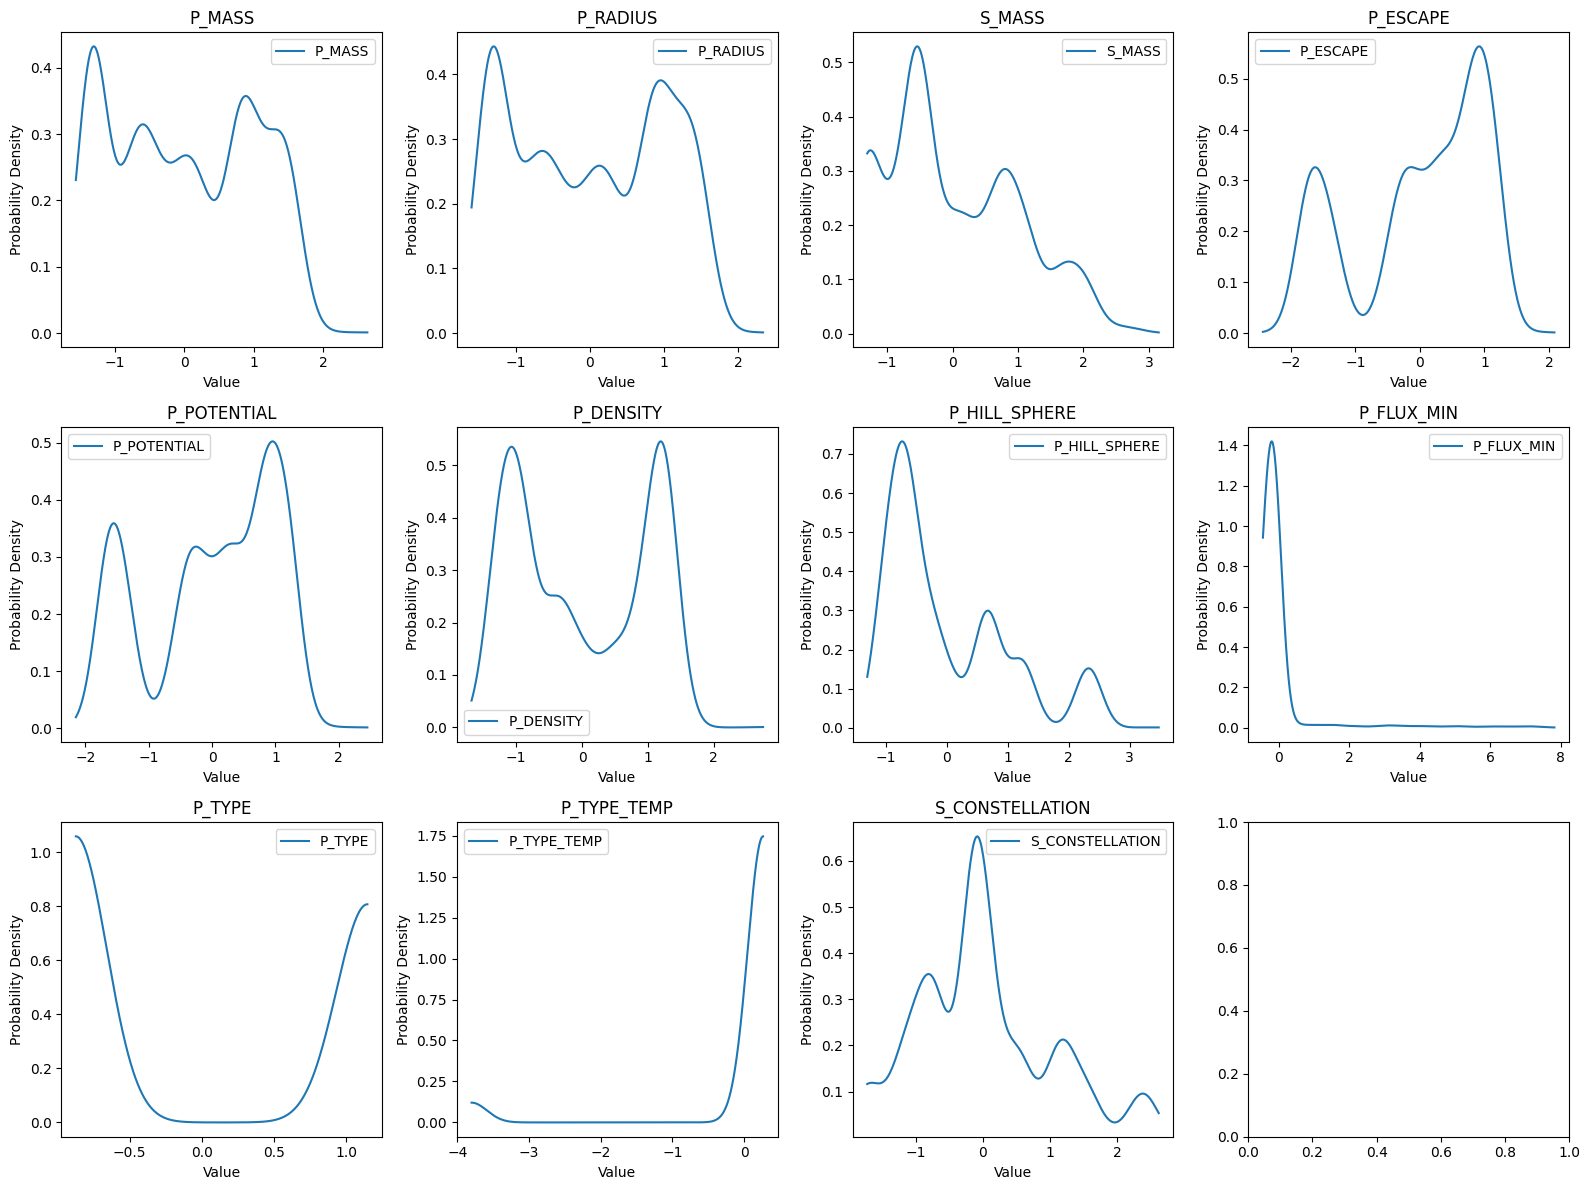

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde


# Visualisation of the scaled training data

feature_names = selected_features

# Determine the number of rows and columns for subplots (adjusted for readability)
n_features = X_train.shape[1]  # Get the number of features (columns)
n_rows = int(np.ceil(n_features / 4))  # Calculate number of rows (consider ceiling)
n_cols = min(n_features, 4)  # Limit columns to 4 for better readability

# Create a figure with an appropriate number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))  # Adjust figsize as needed

# Loop through each feature and corresponding subplot axis
feature_idx = 0
for i in range(n_rows):
    for j in range(n_cols):
        if feature_idx >= n_features:
            continue  # Handle cases where features don't fill all subplots
        feature_name = feature_names[feature_idx]

        # Calculate KDE for the current feature
        kde_func = kde.gaussian_kde(X_train[:, feature_idx])
        x = np.linspace(X_train[:, feature_idx].min(), X_train[:, feature_idx].max(), 1000)  # Define evaluation points
        density = kde_func(x)

        # Plot the KDE curve
        axes[i, j].plot(x, density, label=feature_name)
        axes[i, j].set_xlabel("Value")
        axes[i, j].set_ylabel("Probability Density")
        axes[i, j].set_title(feature_name)
        axes[i, j].legend()
        feature_idx += 1

# Adjust layout (optional)
fig.tight_layout()

plt.show()


In [46]:
# pickling the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

##Training models on different classifier models:

####Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42,
                                  n_estimators=50,
                                  max_depth=10,
                                  min_samples_split=30,
                                  min_samples_leaf=20
                                  )
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [48]:

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred_rf))

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(rf_accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      0.86      0.92       415
           2       0.89      1.00      0.94       494

    accuracy                           0.94       962
   macro avg       0.96      0.95      0.95       962
weighted avg       0.94      0.94      0.94       962

0.9376299376299376


####Naive Bayes Classifier

In [49]:
# Guassian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print(classification_report(y_test, y_pred_nb))

nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(nb_accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00       415
           2       1.00      1.00      1.00       494

    accuracy                           1.00       962
   macro avg       1.00      1.00      1.00       962
weighted avg       1.00      1.00      1.00       962

1.0


####XGBoost classifier

In [50]:
# XGBoost classifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state = 7)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(xgb_accuracy)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       1.00      0.86      0.92       415
           2       0.89      1.00      0.94       494

    accuracy                           0.94       962
   macro avg       0.96      0.95      0.95       962
weighted avg       0.94      0.94      0.94       962

0.9365904365904366


####K-Nearest-Neighbor

In [51]:
# k-NN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print(classification_report(y_test, y_pred_knn))

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(knn_accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00       415
           2       1.00      1.00      1.00       494

    accuracy                           1.00       962
   macro avg       1.00      1.00      1.00       962
weighted avg       1.00      1.00      1.00       962

1.0


##Random_Forest model shows overall best accuracy for the data; so we select it as our model to predict classes for any given new features

In [52]:
# pickiling model
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

Accept user data to predict:

In [53]:
print(selected_features)

['P_MASS', 'P_RADIUS', 'S_MASS', 'P_ESCAPE', 'P_POTENTIAL', 'P_DENSITY', 'P_HILL_SPHERE', 'P_FLUX_MIN', 'P_TYPE', 'P_TYPE_TEMP', 'S_CONSTELLATION']


#Acquire  new data of features to predict habitability of planet

In [60]:
loaded_encoders = joblib.load('lencoders.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_model = joblib.load('rf_model.pkl')


planet_types = ['Jovian', 'Neptunian', 'Superterran', 'Terran', 'Subterran','Miniterran']
planet_temp_types = ['Hot', 'Cold', 'Warm']
constellation_types = ['Scorpius', 'Cygnus', 'Lyra', 'Pisces', 'Ursa Major', 'Ophiuchus',
       'Leo', 'Cetus', 'Libra', 'Draco', 'Hydrus', 'Aquarius', 'Carina',
       'Eridanus', 'Cassiopeia', 'Caelum', 'Canes Venatici', 'Aquila',
       'Crater', 'Sagittarius', 'Taurus', 'Hercules', 'Hydra', 'Lynx',
       'Lepus', 'Cancer', 'Virgo', 'Bootes', 'Lupus', 'Orion',
       'Centaurus', 'Microscopium', 'Lacerta', 'Phoenix', 'Pavo',
       'Tucana', 'Pyxis', 'Andromeda', 'Auriga', 'Dorado', 'Puppis',
       'Horologium', 'Pegasus', 'Equuleus', 'Indus', 'Canis Major',
       'Sculptor', 'Columba', 'Mensa', 'Octans', 'Aries',
       'Corona Borealis', 'Perseus', 'Sextans', 'Serpens', 'Canis Minor',
       'Ursa Minor', 'Capricornus', 'Volans', 'Grus', 'Monoceros', 'Vela',
       'Gemini', 'Antlia', 'Pictor', 'Circinus', 'Cepheus',
       'Corona Australis', 'Telescopium', 'Apus', 'Coma Berenices',
       'Sagitta', 'Vulpecula', 'Delphinus', 'Fornax', 'Camelopardalis',
       'Triangulum', 'Corvus', 'Leo Minor', 'Reticulum', 'Musca',
       'Piscis Austrinus', 'Norma', 'Scutum', 'Ara',
       'Triangulum Australe', 'Chamaeleon', 'Crux']

#Accepting user values-->
print("------Enter values for features-----\nThe values are in Earth units or solar units\nLogical range of values are given in brackets")
p_mass = eval(input("mass of planet(0.02 - 89700): "))
p_rad = eval(input("radius of planet(0.3 - 78): "))
s_mass = eval(input("mass of star(0.01 - 12): "))
p_escape = eval(input("escape velocity of planet(0.2 - 53): "))
p_potential = eval(input("gravitational potential of planet(0.05 - 2750): "))
p_density = eval(input("density of planet(0.005 - 748): "))
p_hill_sphere = eval(input("hill sphere of planet(0.00005 - 1320): "))
p_flux_min = eval(input("minimum stellar flux of planet(3.2e-10 - 8.8e+05): "))

print("List of planet types: ",planet_types)
p_type = (input("type of planet: "))

print("List of planet temperature types: ",planet_types)
p_type_temp = (input("thermal type of planet: "))

print("List of constellations: ",constellation_types)
s_constellation = (input("constellation of star: "))

#converting string to array to be possible for encoding
p_type = [p_type]
p_type_temp = [p_type_temp]
s_constellation = [s_constellation]

#encoding categorical data
p_type_encoder = loaded_encoders['P_TYPE']
p_type_encoded = p_type_encoder.transform(p_type)

p_type_temp_encoder = loaded_encoders['P_TYPE_TEMP']
p_type_temp_encoded = p_type_temp_encoder.transform(p_type_temp)

s_constellation_encoder = loaded_encoders['S_CONSTELLATION']
s_constellation_encoded = s_constellation_encoder.transform(s_constellation)

#constructing feature vector
f_vect = [p_mass, p_rad, s_mass, p_escape, p_potential, p_density, p_hill_sphere, p_flux_min, p_type_encoded[0], p_type_temp_encoded[0], s_constellation_encoded[0]]
print(f_vect)
f_vect_reshaped = np.array(f_vect).reshape(1, -1)
f_vect_scaled = loaded_scaler.transform(f_vect_reshaped)

#predicting class with given feature vector
habitability_prediction = loaded_model.predict(f_vect_scaled)
print(habitability_prediction)

if habitability_prediction[0]==0:
  print("The exoplanet with given features is not habitable")
elif habitability_prediction[0]==1:
  print("The exoplanet with given features is conservatively habitable")
elif habitability_prediction[0]==2:
  print("The exoplanet with given features is optimistically habitable")
else:
  print("Input data error")

------Enter values for features-----
The values are in Earth units or solar units
Logical range of values are given in brackets
mass of planet(0.02 - 89700): 0.6
radius of planet(0.3 - 78): 2.1
mass of star(0.01 - 12): 2.3
escape velocity of planet(0.2 - 53): 1.4
gravitational potential of planet(0.05 - 2750): 1.9
density of planet(0.005 - 748): 0.9
hill sphere of planet(0.00005 - 1320): 0.002
minimum stellar flux of planet(3.2e-10 - 8.8e+05): 2.6
List of planet types:  ['Jovian', 'Neptunian', 'Superterran', 'Terran', 'Subterran', 'Miniterran']
type of planet: Terran
List of planet temperature types:  ['Jovian', 'Neptunian', 'Superterran', 'Terran', 'Subterran', 'Miniterran']
thermal type of planet: Warm
List of constellations:  ['Scorpius', 'Cygnus', 'Lyra', 'Pisces', 'Ursa Major', 'Ophiuchus', 'Leo', 'Cetus', 'Libra', 'Draco', 'Hydrus', 'Aquarius', 'Carina', 'Eridanus', 'Cassiopeia', 'Caelum', 'Canes Venatici', 'Aquila', 'Crater', 'Sagittarius', 'Taurus', 'Hercules', 'Hydra', 'Lynx',

Some examples of planets having different classes of habitability

In [69]:


def get_prediction(cp_mass, cp_rad, cs_mass, cp_escape, cp_potential, cp_density, cp_hill_sphere, cp_flux_min, cp_type, cp_type_temp, cs_constellation):

  #converting string to array to be possible for encoding
  cp_type = [cp_type]
  cp_type_temp = [cp_type_temp]
  cs_constellation = [cs_constellation]

  #encoding categorical data
  cp_type_encoder = loaded_encoders['P_TYPE']
  cp_type_encoded = p_type_encoder.transform(cp_type)

  cp_type_temp_encoder = loaded_encoders['P_TYPE_TEMP']
  cp_type_temp_encoded = p_type_temp_encoder.transform(cp_type_temp)

  cs_constellation_encoder = loaded_encoders['S_CONSTELLATION']
  cs_constellation_encoded = s_constellation_encoder.transform(cs_constellation)

  #constructing feature vector
  f_vect = [cp_mass, cp_rad, cs_mass, cp_escape, cp_potential, cp_density, cp_hill_sphere, cp_flux_min, cp_type_encoded[0], cp_type_temp_encoded[0], cs_constellation_encoded[0]]
  print("feature_vector for given features: ", f_vect)
  f_vect_reshaped = np.array(f_vect).reshape(1, -1)
  f_vect_scaled = loaded_scaler.transform(f_vect_reshaped)

  #predicting class with given feature vector
  habitability_prediction = loaded_model.predict(f_vect_scaled)
  print("prediction: ", habitability_prediction)

  if habitability_prediction[0]==0:
    print("The exoplanet with given features is not habitable")
  elif habitability_prediction[0]==1:
    print("The exoplanet with given features is conservatively habitable")
  elif habitability_prediction[0]==2:
    print("The exoplanet with given features is optimistically habitable")
  else:
    print("Input data error")

print("----Some Examples of different classes of planets----\n")
print("planet 1")
print("features of planet 1: 5.27, 2.13, 0.48, 1.559, 2.43, 0.548, 0.0046, 0.794, 'Terran', 'Warm','Leo'")
get_prediction(5.27, 2.13, 0.48, 1.559, 2.43, 0.548, 0.0046, 0.794, 'Terran', 'Warm','Leo')
print()

print("planet 2")
print("features of planet 1: 1.78, 1.2, 0.24, 1.18, 1.42, 0.97, 0.001, 0.72, 'Subterran', 'Warm', 'Scorpius'")
get_prediction(1.78, 1.2, 0.24, 1.18, 1.42, 0.97, 0.001, 0.72, 'Subterran', 'Warm', 'Scorpius')
print()

print("planet 3")
print("features of planet 1: 4.2, 1.8, 0.59, 1.43, 2.14, 0.68, 0.0024, 8.011, 'Neptunian', 'Cold', 'Hydra'")
get_prediction(4.2, 1.8, 0.59, 1.43, 2.14, 0.68, 0.0024, 8.011, 'Neptunian', 'Cold', 'Hydra')


----Some Examples of different classes of planets----

planet 1
features of planet 1: 5.27, 2.13, 0.48, 1.559, 2.43, 0.548, 0.0046, 0.794, 'Terran', 'Warm','Leo'
feature_vector for given features:  [5.27, 2.13, 0.48, 1.559, 2.43, 0.548, 0.0046, 0.794, 5, 2, 45]
prediction:  [2]
The exoplanet with given features is optimistically habitable

planet 2
features of planet 1: 1.78, 1.2, 0.24, 1.18, 1.42, 0.97, 0.001, 0.72, 'Subterran', 'Warm', 'Scorpius'
feature_vector for given features:  [1.78, 1.2, 0.24, 1.18, 1.42, 0.97, 0.001, 0.72, 3, 2, 72]
prediction:  [1]
The exoplanet with given features is conservatively habitable

planet 3
features of planet 1: 4.2, 1.8, 0.59, 1.43, 2.14, 0.68, 0.0024, 8.011, 'Neptunian', 'Cold', 'Hydra'
feature_vector for given features:  [4.2, 1.8, 0.59, 1.43, 2.14, 0.68, 0.0024, 8.011, 2, 0, 41]
prediction:  [0]
The exoplanet with given features is not habitable


Thank You!